In [1]:
import sys
sys.path.append("/home/evlasova/mirpy")

In [2]:
from mir.common.parser import *
from mir.common.repertoire import Repertoire
from mir.common.repertoire_dataset import RepertoireDataset
from mir.common.clonotype_dataset import ClonotypeDataset
from mir.basic.segment_usage import *
from mir.basic.sampling import RepertoireSampling
from pympler.asizeof import asizeof
from mir.biomarkers.fisher_biomarkers_detector import FisherBiomarkersDetector
from mir.comparative.pair_matcher import PairMatcher
import time

/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import os
os.chdir('../')

In [4]:
metadata = pd.read_csv('data/preprocessed_fmba_metadata_alpha_with_sev.csv')
metadata

,sequencingDate,folder,R1,R2,name,COVID_status,projectName,COVID_IgG,COVID_IgM,COVID_PCR,...,hospital_treatment,severity,complications,sars_cov_2_antibodies,is_vaccinated,long_covid,blood_group,rh_factor,days_since_symptoms_onset,age
0,2020 10 19,2020/10_FMBA_NovaSeq5,020000010808_S3_L001_R1_001.fastq.gz,020000010808_S3_L001_R2_001.fastq.gz,020000010808,COVID,FMBA_DNA,yes,no,negative,...,NaN,NaN,NaN,IgG,False,False,0(I),Rh+,NaN,71.0
1,2020 09 05,2020/09_FMBA_NovaSeq_DNA,020000110808_S14_L001_R1_001.fastq.gz,020000110808_S14_L001_R2_001.fastq.gz,020000110808,COVID,FMBA_DNA,yes,yes,negative,...,NaN,NaN,NaN,IgG/IgM,False,False,0(I),Rh+,NaN,43.0
2,2020 10 19,2020/10_FMBA_NovaSeq5,020000190808_S27_L001_R1_001.fastq.gz,020000190808_S27_L001_R2_001.fastq.gz,020000190808,COVID,FMBA_DNA,yes,no,negative,...,NaN,NaN,NaN,IgG,False,False,B(III),Rh-,NaN,24.0
3,2020 10 19,2020/10_FMBA_NovaSeq5,020000200808_S181_L002_R1_001.fastq.gz,020000200808_S181_L002_R2_001.fastq.gz,020000200808,healthy,FMBA_DNA,no,no,negative,...,NaN,NaN,NaN,none,False,False,B(III),Rh+,NaN,20.0
4,2020 10 19,2020/10_FMBA_NovaSeq5,020000280808_S59_L001_R1_001.fastq.gz,020000280808_S59_L001_R2_001.fastq.gz,020000280808,COVID,FMBA_DNA,yes,no,negative,...,NaN,NaN,NaN,IgG,False,False,B(III),Rh+,NaN,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,2021 01 07,2021/01_FMBA_NovaSeq9,p18_72_DNA_S88_L002_R1_001.fastq.gz,p18_72_DNA_S88_L002_R2_001.fastq.gz,p18_72_DNA,COVID,FMBA_DNA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1270,2021 01 07,2021/01_FMBA_NovaSeq9,p18_73_DNA_S89_L002_R1_001.fastq.gz,p18_73_DNA_S89_L002_R2_001.fastq.gz,p18_73_DNA,COVID,FMBA_DNA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1271,2021 01 07,2021/01_FMBA_NovaSeq9,p18_74_DNA_S90_L002_R1_001.fastq.gz,p18_74_DNA_S90_L002_R2_001.fastq.gz,p18_74_DNA,COVID,FMBA_DNA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1272,2021 01 07,2021/01_FMBA_NovaSeq9,p18_75_DNA_S91_L002_R1_001.fastq.gz,p18_75_DNA_S91_L002_R2_001.fastq.gz,p18_75_DNA,COVID,FMBA_DNA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
metadata = metadata[~metadata.run.isna()].reset_index(drop=True)

In [6]:
t0 = time.time()
dataset = RepertoireDataset.load(parser=VDJtoolsParser(sep=','), 
                                 metadata=metadata,
                                 threads=32,
                                 paths=[f'/projects/fmba_covid/publication/downsampled_fmba_TRA/{r["run"]}' for _, r in metadata.iterrows()], 
                                 clonotype_pair_matcher=PairMatcher('cdr3aa,v'))
print(time.time() - t0)

loading Repertoire objects: 100%|██████████| 1273/1273 [04:22<00:00,  4.84it/s]


264.1933102607727


In [7]:
dataset

There are 1273 repertoires in the dataset
  sequencingDate                    folder  \
0     2020 10 19     2020/10_FMBA_NovaSeq5   
1     2020 09 05  2020/09_FMBA_NovaSeq_DNA   
2     2020 10 19     2020/10_FMBA_NovaSeq5   
3     2020 10 19     2020/10_FMBA_NovaSeq5   
4     2020 10 19     2020/10_FMBA_NovaSeq5   

                                       R1  \
0    020000010808_S3_L001_R1_001.fastq.gz   
1   020000110808_S14_L001_R1_001.fastq.gz   
2   020000190808_S27_L001_R1_001.fastq.gz   
3  020000200808_S181_L002_R1_001.fastq.gz   
4   020000280808_S59_L001_R1_001.fastq.gz   

                                       R2          name COVID_status  \
0    020000010808_S3_L001_R2_001.fastq.gz  020000010808        COVID   
1   020000110808_S14_L001_R2_001.fastq.gz  020000110808        COVID   
2   020000190808_S27_L001_R2_001.fastq.gz  020000190808        COVID   
3  020000200808_S181_L002_R2_001.fastq.gz  020000200808      healthy   
4   020000280808_S59_L001_R2_001.fastq.gz  0200002

In [8]:
len(dataset.clonotype_usage_matrix.public_clonotypes)

clonotype usage matrix should be calculated. it would take a while
started public clonotypes extraction at 2025-03-20 11:32:35.195040
there are 2060187 public clonotypes
finished public clonotypes extraction at 2025-03-20 11:37:54.987292
there are 2060187 public clonotypes


2060187

In [9]:
dataset.threads = 4

In [10]:
from tqdm import trange

In [11]:
5

5

In [12]:
for i in trange(len(dataset)):
    dataset.deserialize_repertoire(i)

100%|██████████| 1273/1273 [00:00<00:00, 778330.76it/s]


In [13]:
healthy_rd, ill_rd = dataset.split_by_metadata_function(
        splitting_method=lambda x: x['COVID_status']=='healthy'
    )

In [14]:
healthy_rd

There are 383 repertoires in the dataset
  sequencingDate                     folder  \
0     2020 10 19      2020/10_FMBA_NovaSeq5   
1     2020 12 18  2020/12_FMBA_Novaseq8_DNA   
2     2020 10 19      2020/10_FMBA_NovaSeq5   
3     2020 10 19      2020/10_FMBA_NovaSeq5   
4     2020 10 19      2020/10_FMBA_NovaSeq5   

                                       R1  \
0  020000200808_S181_L002_R1_001.fastq.gz   
1  020000330101_S185_L002_R1_001.fastq.gz   
2  020000350808_S126_L002_R1_001.fastq.gz   
3  020000360808_S102_L002_R1_001.fastq.gz   
4  020000390808_S189_L002_R1_001.fastq.gz   

                                       R2            name COVID_status  \
0  020000200808_S181_L002_R2_001.fastq.gz    020000200808      healthy   
1  020000330101_S185_L002_R2_001.fastq.gz  020000330101_2      healthy   
2  020000350808_S126_L002_R2_001.fastq.gz    020000350808      healthy   
3  020000360808_S102_L002_R2_001.fastq.gz    020000360808      healthy   
4  020000390808_S189_L002_R2_001.fa

In [15]:
ill_rd

There are 890 repertoires in the dataset
  sequencingDate                    folder  \
0     2020 10 19     2020/10_FMBA_NovaSeq5   
1     2020 09 05  2020/09_FMBA_NovaSeq_DNA   
2     2020 10 19     2020/10_FMBA_NovaSeq5   
3     2020 10 19     2020/10_FMBA_NovaSeq5   
4     2020 10 19     2020/10_FMBA_NovaSeq5   

                                      R1  \
0   020000010808_S3_L001_R1_001.fastq.gz   
1  020000110808_S14_L001_R1_001.fastq.gz   
2  020000190808_S27_L001_R1_001.fastq.gz   
3  020000280808_S59_L001_R1_001.fastq.gz   
4  020000340808_S82_L001_R1_001.fastq.gz   

                                      R2          name COVID_status  \
0   020000010808_S3_L001_R2_001.fastq.gz  020000010808        COVID   
1  020000110808_S14_L001_R2_001.fastq.gz  020000110808        COVID   
2  020000190808_S27_L001_R2_001.fastq.gz  020000190808        COVID   
3  020000280808_S59_L001_R2_001.fastq.gz  020000280808        COVID   
4  020000340808_S82_L001_R2_001.fastq.gz  020000340808        

In [16]:
fbd = FisherBiomarkersDetector(control_repertoire_dataset=healthy_rd,
                               ill_repertoire_dataset=ill_rd, 
                               adjusted_p_value=0.05, 
                               threads=28)

created a fisher biomarker detector with 28 threads


In [17]:
healthy_rd.serialize_repertoires()

repertoire dataset serialization: 383it [01:06,  5.72it/s]


In [18]:
ill_rd.serialize_repertoires()

repertoire dataset serialization: 890it [02:55,  5.07it/s]


In [19]:
healthy_rd.clonotype_usage_matrix.clonotype_database_usage

clonotype usage matrix should be calculated. it would take a while
there are 2060187 public clonotypes
created MultipleRepertoireDenseMatcher
started with 4 threads
all in all 383 reps, chunk size is 96, number of batches 4


clonotype usage matrix preparation: 100%|██████████| 4/4 [32:51<00:00, 492.79s/it]   


<Compressed Sparse Column sparse array of dtype 'float64'
	with 244531165 stored elements and shape (383, 2060187)>

In [20]:
healthy_rd.serialize_repertoires()

In [21]:
ill_rd.clonotype_usage_matrix.clonotype_database_usage

clonotype usage matrix should be calculated. it would take a while
there are 2060187 public clonotypes
created MultipleRepertoireDenseMatcher
started with 4 threads
all in all 890 reps, chunk size is 223, number of batches 4


clonotype usage matrix preparation: 100%|██████████| 4/4 [1:27:42<00:00, 1315.51s/it]  


<Compressed Sparse Column sparse array of dtype 'float64'
	with 579927290 stored elements and shape (890, 2060187)>

In [22]:
ill_rd.clonotype_usage_matrix.clonotype_database_usage

<Compressed Sparse Column sparse array of dtype 'float64'
	with 579927290 stored elements and shape (890, 2060187)>

In [23]:
t0 = time.time()
biomarkers = fbd.detect_biomarkers()
print(time.time() - t0)

[2025-03-20 13:45:06.376979]: there are 2060187 public clonotypes in ill repertoire
[2025-03-20 13:45:06.377107]: started creating func arguments
[2025-03-20 13:51:44.133288]: finished creating func arguments
[2025-03-20 13:51:44.133457]: chunksize is 2060


fisher testing in progress: 100%|██████████| 2060187/2060187 [00:26<00:00, 79142.87it/s] 


455.3618071079254


In [24]:
len(biomarkers)

22401

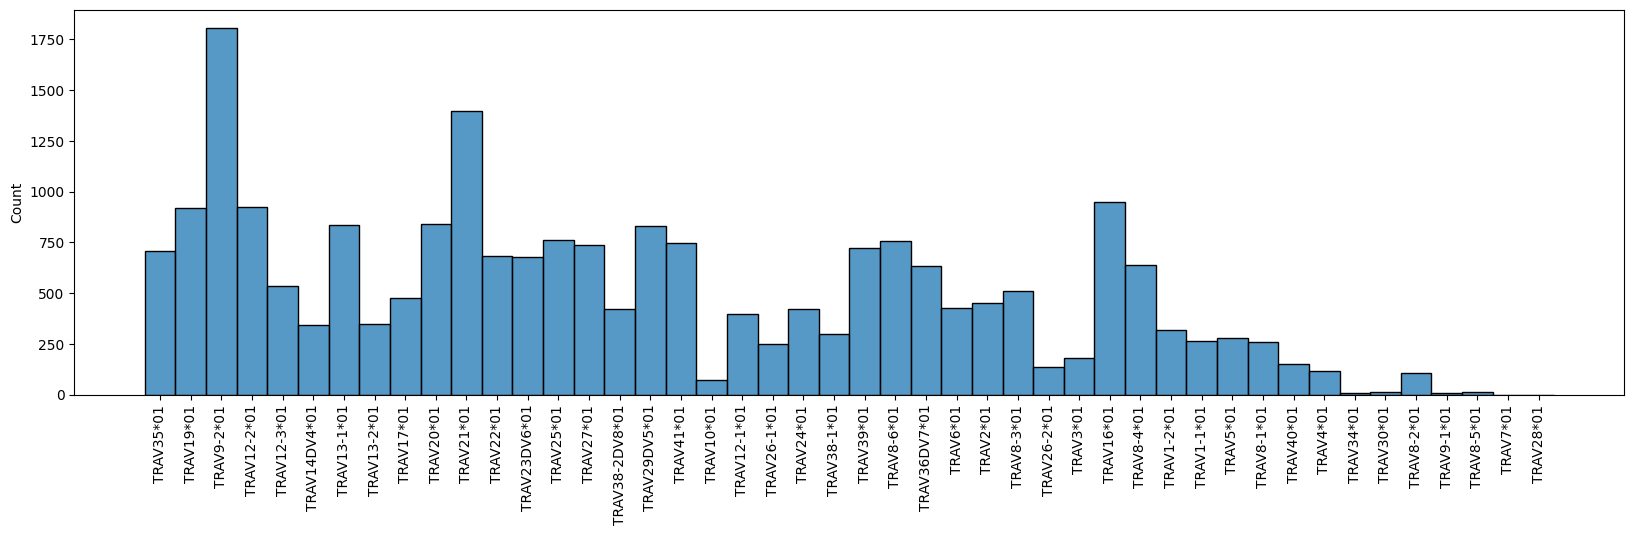

In [25]:
plt.figure(figsize=(20, 5))
sns.histplot(pd.Series([x.v for x in biomarkers]))
plt.xticks(rotation=90)
plt.show()

In [26]:
from collections import Counter

In [27]:
matrix = NormalizedSegmentUsageTable.load_from_repertoire_dataset(dataset, gene='TRA', segment_type='V')

In [28]:
matrix.segment_usage_matrix

,TRAV24*01,TRAV35*01,TRAV8-7*01,TRAV30*01,TRAV25*01,TRAV40*01,TRAV13-1*01,TRAV12-3*01,TRAV3*01,TRAV27*01,...,TRAV8-4*01,TRAV20*01,TRAV8-5*01,TRAV6*01,TRAV2*01,TRAV8-3*01,TRAV1-1*01,TRAV17*01,TRAV22*01,TRAV29DV5*01
0,0.011586,0.024828,0.0,0.009040,0.019990,0.006494,0.060479,0.016679,0.018717,0.021136,...,0.030685,0.022154,0.002546,0.021772,0.021645,0.032977,0.016679,0.041126,0.019862,0.008276
1,0.013854,0.028351,0.0,0.009222,0.020974,0.007677,0.047738,0.022518,0.016299,0.023333,...,0.031954,0.019344,0.001415,0.015526,0.019773,0.027236,0.008878,0.038430,0.018658,0.035428
2,0.013415,0.031303,0.0,0.008372,0.020175,0.013909,0.041598,0.021605,0.013883,0.025115,...,0.029119,0.017809,0.003068,0.016119,0.017237,0.030835,0.006812,0.043444,0.018485,0.043158
3,0.012140,0.029806,0.0,0.006996,0.022375,0.013964,0.041647,0.027438,0.014971,0.029643,...,0.021695,0.022294,0.001361,0.015080,0.014699,0.025288,0.008547,0.038218,0.020551,0.035931
4,0.012655,0.028857,0.0,0.007013,0.025713,0.009673,0.052555,0.023376,0.018539,0.024343,...,0.024021,0.022328,0.000645,0.015879,0.014670,0.030227,0.006045,0.052716,0.019265,0.014187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,0.013872,0.026898,0.0,0.006024,0.021074,0.009448,0.055553,0.027410,0.011582,0.023497,...,0.033101,0.019318,0.000711,0.019651,0.018985,0.036191,0.007669,0.030033,0.015828,0.045861
1269,0.013705,0.032891,0.0,0.005806,0.024725,0.013716,0.047570,0.025989,0.008480,0.030262,...,0.033149,0.019187,0.001096,0.015730,0.013604,0.030341,0.006534,0.023785,0.015629,0.057504
1270,0.012450,0.034553,0.0,0.006351,0.017869,0.016936,0.038334,0.026698,0.011938,0.029815,...,0.026833,0.023161,0.001521,0.014601,0.010594,0.022321,0.008754,0.042963,0.016298,0.052010
1271,0.012397,0.036844,0.0,0.006147,0.012032,0.020313,0.048576,0.027664,0.006156,0.040927,...,0.024180,0.026137,0.001845,0.020796,0.014068,0.030538,0.009883,0.014597,0.014480,0.036250


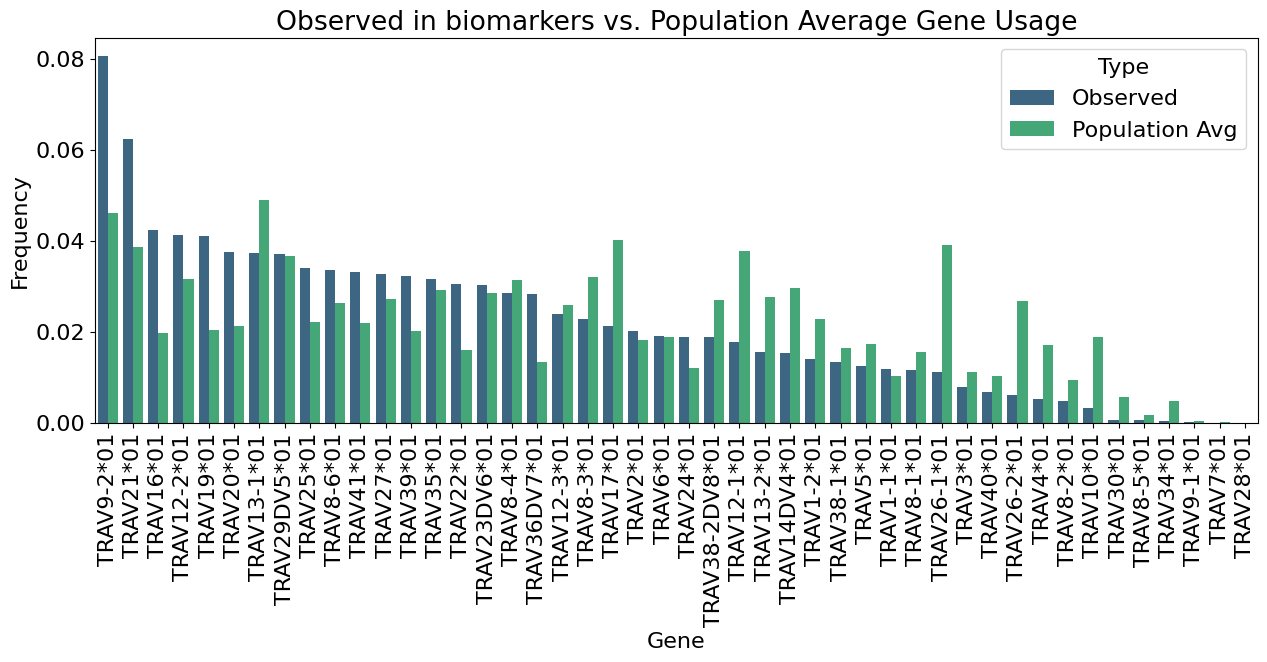

In [75]:
observed_counts = Counter(pd.Series(pd.Series([x.v for x in biomarkers])))

# Compute average usage in the population dataset
population_means = matrix.segment_usage_matrix.mean().to_dict()

# Merge observed counts and population means into a DataFrame
data = []
for gene in observed_counts:
    data.append({'Gene': gene, 'Frequency': observed_counts[gene] / len(biomarkers), 'Type': 'Observed'})
    data.append({'Gene': gene, 'Frequency': population_means.get(gene, 0), 'Type': 'Population Avg'})

plot_df = pd.DataFrame(data)

# Sort genes by observed frequency
sorted_genes = sorted(observed_counts.keys(), key=lambda g: observed_counts[g], reverse=True)
plot_df['Gene'] = pd.Categorical(plot_df['Gene'], categories=sorted_genes, ordered=True)

# Create the grouped bar plot
plt.figure(figsize=(15, 5))
sns.barplot(x="Gene", y="Frequency", hue="Type", data=plot_df, palette="viridis")

# Add labels
plt.xlabel("Gene")
plt.ylabel("Frequency")
plt.title("Observed in biomarkers vs. Population Average Gene Usage")
plt.xticks(rotation=90)
plt.legend(title="Type")

plt.savefig('alpha_v_gene_usage.svg')
# Show plot
plt.show()

/scratch/ipykernel_2797056/3527289201.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels), y=list(values), palette="viridis")


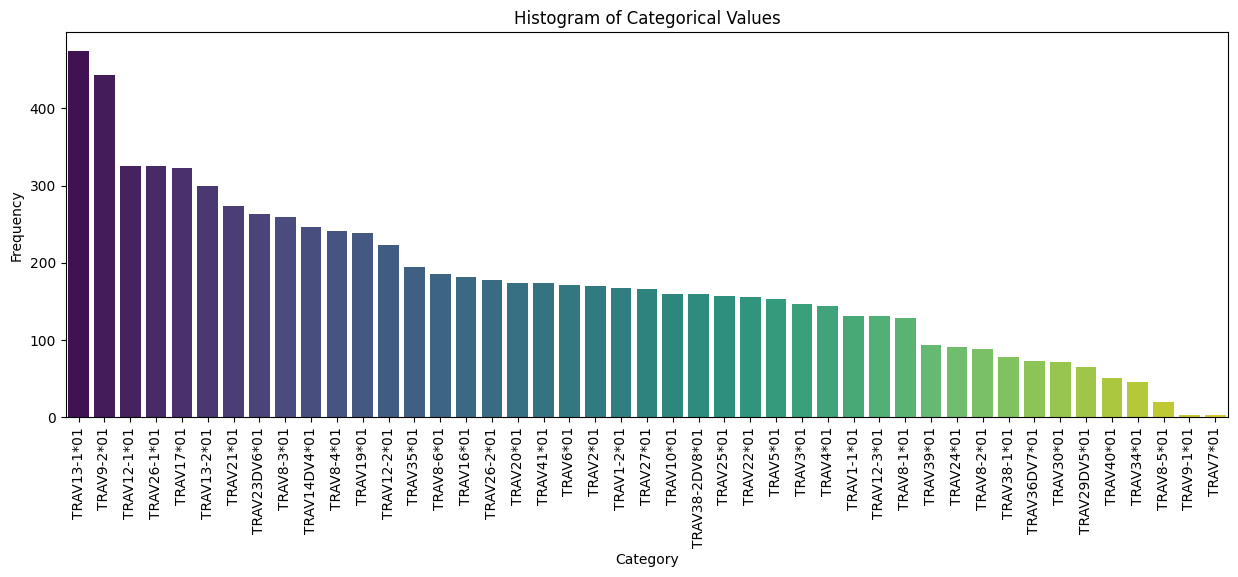

In [30]:
counts = Counter(pd.Series([x.v for x in dataset[0]]))
sorted_items = sorted(counts.items(), key=lambda x: x[1], reverse=True)
labels, values = zip(*sorted_items)

# Create a Seaborn bar plot
plt.figure(figsize=(15, 5))
sns.barplot(x=list(labels), y=list(values), palette="viridis")

# Add labels
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Histogram of Categorical Values")
plt.xticks(rotation=90)
plt.show()

/scratch/ipykernel_2797056/3456701864.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels), y=list(values), palette="viridis")


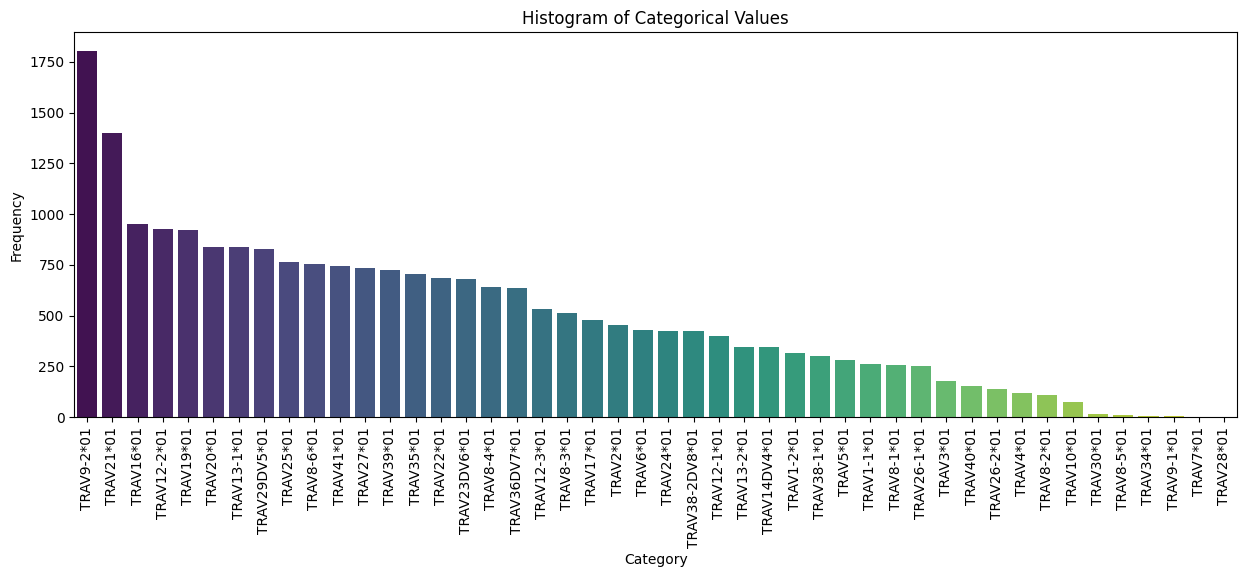

In [31]:
counts = Counter(pd.Series([x.v for x in biomarkers]))
sorted_items = sorted(counts.items(), key=lambda x: x[1], reverse=True)
labels, values = zip(*sorted_items)

# Create a Seaborn bar plot
plt.figure(figsize=(15, 5))
sns.barplot(x=list(labels), y=list(values), palette="viridis")

# Add labels
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Histogram of Categorical Values")
plt.xticks(rotation=90)
plt.show()

In [32]:
len(fbd.get_fold_change_to_pval())

90763

In [33]:
res = pd.DataFrame(fbd.get_fold_change_to_pval(-1000000)).T.reset_index()
res

,index,0,1
0,ClonotypeRepresentation(cdr3aa='CAYRSQGGGEETSG...,0.523302,inf
1,ClonotypeRepresentation(cdr3aa='CAETLGDSSYKLIF...,0.686813,0.938541
2,ClonotypeRepresentation(cdr3aa='RAVTPGGSYIPTF'...,0.926291,0.825110
3,"ClonotypeRepresentation(cdr3aa='CVVSDRDQFYF', ...",0.978973,0.623118
4,ClonotypeRepresentation(cdr3aa='CALSEYYNTNAGKS...,0.391804,1.147106
...,...,...,...
2060182,ClonotypeRepresentation(cdr3aa='CIVRAVHGSGNTGK...,0.467879,1.088280
2060183,ClonotypeRepresentation(cdr3aa='CVVSEIGNEKLTF'...,0.343726,1.111259
2060184,"ClonotypeRepresentation(cdr3aa='CAGVDNNYQLIW',...",0.999546,0.776589
2060185,"ClonotypeRepresentation(cdr3aa='CAVPPEKLIF', v...",0.938556,0.605417


In [34]:
res['index'] = res['index'].apply(lambda x: x.cdr3aa)

In [35]:
res

,index,0,1
0,CAYRSQGGGEETSGSRLTF,0.523302,inf
1,CAETLGDSSYKLIF,0.686813,0.938541
2,RAVTPGGSYIPTF,0.926291,0.825110
3,CVVSDRDQFYF,0.978973,0.623118
4,CALSEYYNTNAGKSTF,0.391804,1.147106
...,...,...,...
2060182,CIVRAVHGSGNTGKLIF,0.467879,1.088280
2060183,CVVSEIGNEKLTF,0.343726,1.111259
2060184,CAGVDNNYQLIW,0.999546,0.776589
2060185,CAVPPEKLIF,0.938556,0.605417


In [36]:
res = res.rename(columns={0: 'pval', 1: 'fc'})

In [37]:
res['log_fc'] = np.log(res.fc)
res['logp'] = np.log(res.pval)

/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [38]:
res

,index,pval,fc,log_fc,logp
0,CAYRSQGGGEETSGSRLTF,0.523302,inf,inf,-0.647597
1,CAETLGDSSYKLIF,0.686813,0.938541,-0.063429,-0.375693
2,RAVTPGGSYIPTF,0.926291,0.825110,-0.192239,-0.076567
3,CVVSDRDQFYF,0.978973,0.623118,-0.473019,-0.021251
4,CALSEYYNTNAGKSTF,0.391804,1.147106,0.137242,-0.936993
...,...,...,...,...,...
2060182,CIVRAVHGSGNTGKLIF,0.467879,1.088280,0.084598,-0.759545
2060183,CVVSEIGNEKLTF,0.343726,1.111259,0.105493,-1.067909
2060184,CAGVDNNYQLIW,0.999546,0.776589,-0.252844,-0.000454
2060185,CAVPPEKLIF,0.938556,0.605417,-0.501839,-0.063413


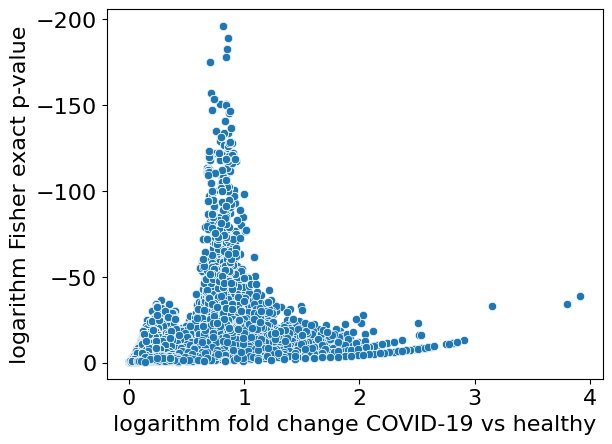

In [77]:
sns.scatterplot(res[res.log_fc > 0], x='log_fc', y='logp')
plt.xlabel('logarithm fold change COVID-19 vs healthy')
plt.ylabel('logarithm Fisher exact p-value')
plt.gca().invert_yaxis()
plt.savefig('logp_to_fc.svg')

cd = ClonotypeDataset(clonotypes=[ClonotypeAA(cdr3aa=x.cdr3aa) for x in biomarkers])

In [41]:
cd.clonotype_clustering

,cdr3aa,cluster
vertex ID,,
0,CAGQLNNFNKFYF,0
1,CAGQLPNFNKFYF,0
2,CAGQLHNFNKFYF,0
3,CAGALNNFNKFYF,0
4,CAGQLYNFNKFYF,0
...,...,...
8896,CALSPAGSGAGSYQLTF,540
8897,CVASARSGGGADGLTF,541
8898,SRNAGNMLTF,542


In [68]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": 'sans-serif', 
    "font.size": 16
})

In [42]:
vdjdb = pd.read_csv('data/vdjdb.txt', sep='\t')

In [43]:
vdjdb = vdjdb[(vdjdb.gene == 'TRA') & (vdjdb.species == 'HomoSapiens')]

In [44]:
common_epi = vdjdb['antigen.epitope'].value_counts()[vdjdb['antigen.epitope'].value_counts() > 30][1:].index

In [45]:
vdjdb = vdjdb[vdjdb['antigen.epitope'].isin(common_epi)]

In [46]:
annotations = cd.annotate_with_database(vdjdb)

100%|██████████| 54/54 [03:15<00:00,  3.63s/it]


In [47]:
annotations = annotations.merge(vdjdb[['antigen.epitope', 'antigen.species']].drop_duplicates())

In [48]:
annotations

,cluster,antigen.epitope,pval,antigen.species
0,11,ELAGIGILTV,1.140010e-35,HomoSapiens
1,23,ELAGIGILTV,3.641960e-13,HomoSapiens
2,55,ELAGIGILTV,3.491445e-14,HomoSapiens
3,69,ELAGIGILTV,3.647017e-23,HomoSapiens
4,99,ELAGIGILTV,1.033960e-06,HomoSapiens
...,...,...,...,...
137,23,RLPGVLPRA,1.028776e-20,HomoSapiens
138,2,KTFPPTEPK,3.962211e-15,SARS-CoV-2
139,6,KTFPPTEPK,3.720421e-11,SARS-CoV-2
140,36,KTFPPTEPK,1.045879e-16,SARS-CoV-2


In [49]:
len(annotations[annotations['antigen.species'] == 'SARS-CoV-2'])

36

In [50]:
cd.clonotype_clustering.cluster.value_counts()[cd.clonotype_clustering.cluster.value_counts() > 5].index

Index([  0,   2,  13,   7,  20,   9,   6,  23,   4,  56,  14,  36,   3,  21,
        12,  34,  46,  16,  54,  22,  73,  11,  32,  26,  31,   8,  37,  17,
        81,   1,  53,  57,  55,  42,  69,  61,  24,  83, 122, 101,  58,  33,
        19,  48,  10, 151, 180,  39, 160, 111,  38,  44,  49, 118,  45, 146,
       110,  93, 220, 159, 105,  15, 125, 170,  59, 264, 223, 296,  91, 252],
      dtype='int64', name='cluster')

<Axes: xlabel='cluster', ylabel='Count'>

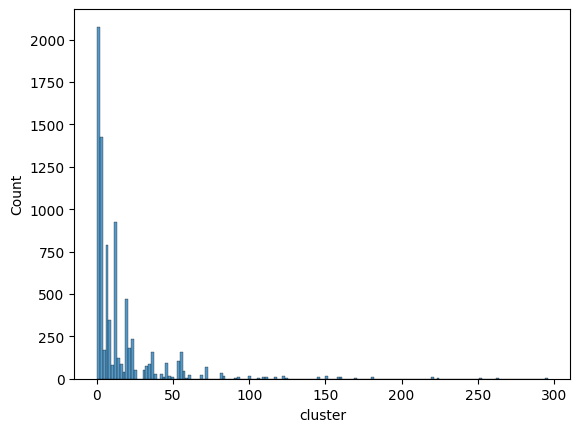

In [51]:
sns.histplot(cd.clonotype_clustering[cd.clonotype_clustering.cluster.isin(cd.clonotype_clustering.cluster.value_counts()[cd.clonotype_clustering.cluster.value_counts() > 5].index)].cluster)

/home/evlasova/mirpy/mir/common/clonotype_dataset.py:254: UserWarning: 
The palette list has fewer values (100) than needed (182) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(plotting_df[plotting_df.cluster_size > 1], x='x', y='y', hue=color_by,
/home/evlasova/mirpy/mir/common/clonotype_dataset.py:257: UserWarning: 
The palette list has fewer values (1) than needed (363) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(plotting_df[plotting_df.cluster_size == 1], x='x', y='y', hue=color_by,


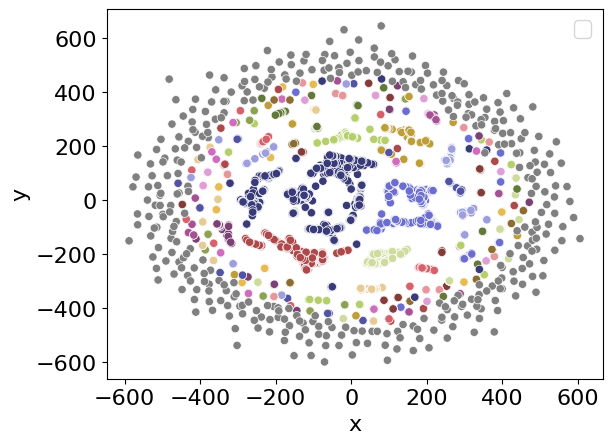

In [70]:
cd.plot_clonotype_clustering(color_by='cluster')
plt.legend([])
plt.savefig('alpha_v_clustering.svg')

In [54]:
cd.clonotype_clustering.cluster.value_counts()

cluster
0      2043
2      1312
13      829
7       545
20      458
       ... 
267       1
263       1
262       1
261       1
282       1
Name: count, Length: 545, dtype: int64

/home/evlasova/mirpy/mir/common/clonotype_dataset.py:254: UserWarning: 
The palette list has fewer values (100) than needed (182) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(plotting_df[plotting_df.cluster_size > 1], x='x', y='y', hue=color_by,
/home/evlasova/mirpy/mir/common/clonotype_dataset.py:257: UserWarning: 
The palette list has fewer values (1) than needed (363) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(plotting_df[plotting_df.cluster_size == 1], x='x', y='y', hue=color_by,


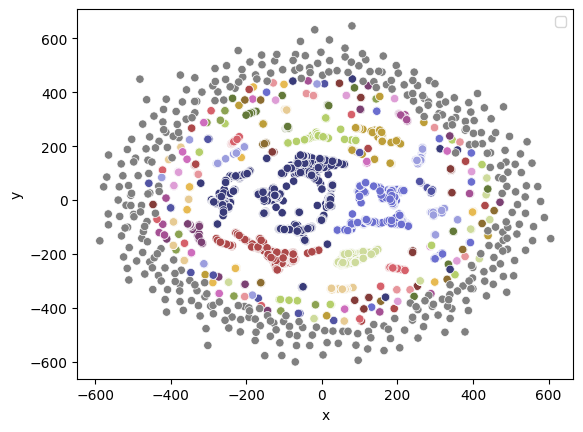

In [58]:
fig, ax = plt.subplots()
cd.plot_clonotype_clustering(color_by='cluster', ax=ax, plot_unclustered=True)
ax.legend([])

In [56]:
cd.pgens

,cdr3aa,pgen
0,CAGQLNNFNKFYF,4.107767e-21
1,CALSERSFGNVLHC,0.000000e+00
2,CAILYNFNKFYF,6.018018e-19
3,CAAQETSGSRLTF,5.743763e-16
4,CAYQYNFNKFYF,1.724684e-20
...,...,...
8896,CALLYNTDKLIF,6.638917e-19
8897,CVVRFNKFYF,2.480470e-17
8898,CAATKYNFNKFYF,7.866638e-22
8899,CIRYNFNKFYF,8.062678e-20


In [ ]:
cd

In [ ]:
cd.clonotype_clustering

In [ ]:
cd.serialize()

In [ ]:
cd